In [394]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')
#warnings
import warnings
warnings.filterwarnings("ignore")

In [395]:
#read cleaned data 
tweet_data=pd.read_csv('../../data/raw-data/R_CRIME_TEXT_DATA.csv')

In [396]:
##column names
column_names = tweet_data.columns
## Using only text column for analysis
tweet_data = tweet_data[['text']]

In [397]:
##column names
column_names = tweet_data.columns
## Using only text column for analysis
tweet_data = tweet_data[['text']]

In [398]:
##column names
column_names = tweet_data.columns

#text data cleaning
#text data
tweet_data = tweet_data[['text']]

#replace # with space
def hashtag(text):
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text


#remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text) #removes numbers from text
    text =  re.sub(r'https*\S+', ' ', text) #removes links from text
    return text
tweet_data['clean text']=tweet_data['text'].apply(lambda x: remove_punct(x))

In [399]:
## Tokenization
def tokenization(text):
    text = re.split('\W+', text) #splitting each sentence/ tweet into its individual words
    return text


tweet_data['Tweet_tokenized'] = tweet_data['clean text'].apply(lambda x: tokenization(x.lower()))

In [400]:
#remove retweets
tweet_data = tweet_data[~tweet_data['text'].str.contains('RT')]
##removing stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
tweet_data['Tweet_without_stop'] = tweet_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [401]:
##Stemming
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data['Tweet_stemmed'] = tweet_data['Tweet_without_stop'].apply(lambda x: stemming(x))

In [402]:
## Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data['Tweet_lemmatized'] = tweet_data['Tweet_without_stop'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chaitanyashekar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chaitanyashekar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [403]:
#Count Vectorizer
from random import sample
clean_tweets=list(set(tweet_data['clean text']))
sample=sample(clean_tweets,20)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
names = vectorizer.get_feature_names()
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [404]:
#Data Visualization
all_clean_words=[]

for i in tweet_data['Tweet_lemmatized']:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str=' '.join(all_clean_words)

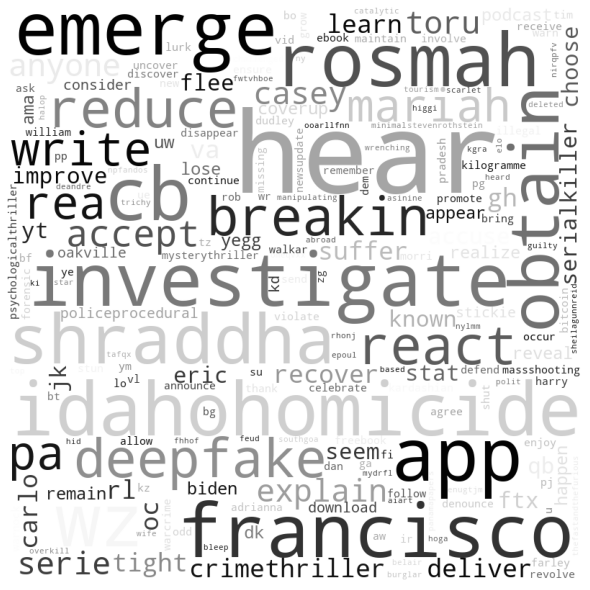

In [405]:
##visualizing the cleaned data
##WordCloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,colormap='gray_r',).generate(clean_words_str)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()